In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 

data_location = r'C:\Users\SIBAHLE RADEBE\Downloads\Project_dataset (1).csv'
ProjectDataSet = pd.read_csv(data_location)

print(ProjectDataSet)

print(ProjectDataSet.head())

print(ProjectDataSet.tail())

print(ProjectDataSet.shape)

ProjectDataSet.info()

print(ProjectDataSet.dtypes)

ProjectDataSet["Young's Modulus"] = pd.to_numeric(ProjectDataSet["Young's Modulus"], errors="coerce")
ProjectDataSet["Density"] = pd.to_numeric(ProjectDataSet["Density"], errors="coerce")

#ProjectDataSet["PVelocity_SVelocity"] = pd.to_numeric(ProjectDataSet["PVelocity_SVelocity"], errors="coerce")
print(ProjectDataSet.dtypes)

ProjectDataSet[["PVelocity", "SVelocity"]] = ProjectDataSet.PVelocity_SVelocity.str.split("_", expand=True)
ProjectDataSet.drop(["PVelocity_SVelocity"], axis = 1, inplace = True)

pd.set_option('mode.chained_assignment', None)
ProjectDataSet["Young's Modulus"].replace(-54,54, inplace = True)
ProjectDataSet["Young's Modulus"].replace(-1,1, inplace = True)
ProjectDataSet["Density"].replace(-5,5, inplace = True)
print(ProjectDataSet)

print(ProjectDataSet.isnull().sum())

mean1 = ProjectDataSet["Young's Modulus"].mean()
ProjectDataSet["Young's Modulus"].fillna(value=mean1, inplace = True)
#ProjectDataSet["Young's Modulus"].replace(to_numeric = NaN, inplace = True)

mean2 = ProjectDataSet["Density"].mean()
ProjectDataSet["Density"].fillna(value=mean2, inplace = True)
#ProjectDataSet["Young's Modulus"].replace(to_numeric = NaN, inplace = True)
print(ProjectDataSet.isnull().sum())

assert pd.notnull(ProjectDataSet).all().all()
assert (ProjectDataSet["Young's Modulus"]>=0).all().all()
assert (ProjectDataSet["Density"]>=0).all().all()

print(pd.melt(frame=ProjectDataSet, id_vars=["Rock Type","Blasting Category"], value_vars=["PF Tech","Rock Factor","Young's Modulus","Density","PVelocity","SVelocity"]))

     Rock Type Blasting Category  PF Tech  Rock Factor Young's Modulus  \
0       Norite              Hard     0.85         14.0               0   
1      Granite              Hard     0.70         13.0             -54   
2    Sandstone            Medium     0.45          9.0            15.9   
3        Shale              Soft     0.25          8.0            emsg   
4         Coal              Soft     0.15          6.0           130.5   
5     Andesite              Hard     0.70         12.0             NaN   
6     Dolerite              Hard     0.70         13.0            88.3   
7    Ironstone              Hard     0.70         12.0               0   
8     Silcrete              Hard     0.70         14.0              -1   
9     Dolomite            Medium     0.45         10.0            72.8   
10    Hornfels            Medium     0.45         10.5            65.8   
11   Quartzite            Medium     0.45         11.0            58.3   
12  Serpentine            Medium     0

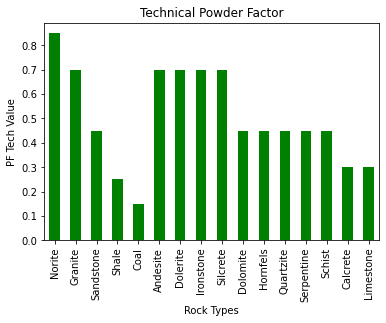

C:\Users\SIBAHLE RADEBE\AppData\Local\Temp\ipykernel_7040\3126885169.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(values)


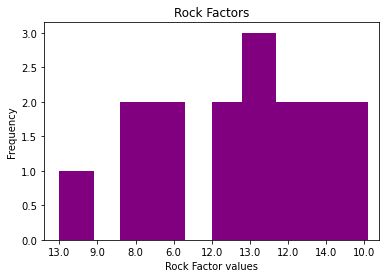

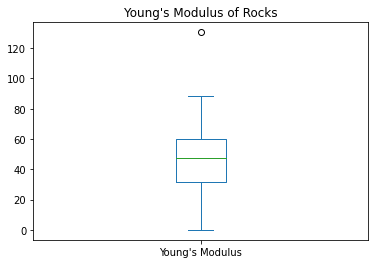

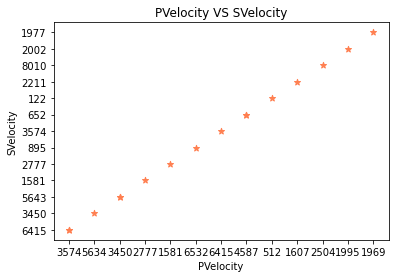

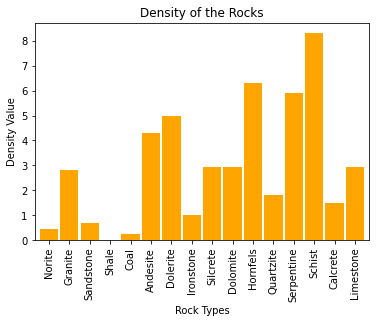

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

rock_types = ("Norite","Granite","Sandstone","Shale","Coal","Andesite","Dolerite","Ironstone","Silcrete","Dolomite","Hornfels","Quartzite","Serpentine","Schist","Calcrete","Limestone")
fig = ProjectDataSet["PF Tech"].plot(kind="bar", color="green", width=0.5)
fig.set_title("Technical Powder Factor")
fig.set_xlabel("Rock Types")
fig.set_ylabel("PF Tech Value")
fig.set_xticklabels(rock_types)
plt.show()

values = ["14.0","13.0","9.0","8.0","6.0","12.0","13.0","12.0","14.0","10.0","10.5","11.0","10.8","11.0","8.0","9.0"]
fig = ProjectDataSet["Rock Factor"].plot(kind="hist", width=0.9, color="purple")
fig.set_title("Rock Factors")
fig.set_xlabel("Rock Factor values")
fig.set_ylabel("Frequency")
fig.set_xticklabels(values)
plt.show()

ProjectDataSet["Young's Modulus"].plot(kind="box")
plt.title("Young's Modulus of Rocks")
plt.show()

ProjectDataSet.plot(kind="scatter", x="PVelocity", y="SVelocity", c="coral", marker="*", s=40)
plt.title("PVelocity VS SVelocity")
plt.show()

rock_types = ("Norite","Granite","Sandstone","Shale","Coal","Andesite","Dolerite","Ironstone","Silcrete","Dolomite","Hornfels","Quartzite","Serpentine","Schist","Calcrete","Limestone")
fig = ProjectDataSet["Density"].plot(kind="bar", color="orange",width=0.9, linestyle="solid")
fig.set_title("Density of the Rocks")
fig.set_xlabel("Rock Types")
fig.set_ylabel("Density Value")
fig.set_xticklabels(rock_types)
plt.show()